# Data Analysis

In [11]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [13]:
# path = "C:/CU FALL 2020/CSCI 4502/data/track_features"
path = "C:/Users/ean10/Documents/School Classes/Data Mining/spotify_dataset/track_features"
data_dir = os.listdir(path)
list_o_dicts = []
for file in data_dir:
    f = open(os.path.join(path,file))
    obj = json.load(f)
    list_o_dicts.append(obj)

i = 0
for d in list_o_dicts:
    if not isinstance(d, dict):
        del list_o_dicts[i]
    i+=1
df = pd.DataFrame(list_o_dicts)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.173,0.0522,5,-27.883,0,0.0541,0.98000,0.019000,0.2040,0.062,171.661,audio_features,000Bm4iL4Jwp2UoWfBgZm5,spotify:track:000Bm4iL4Jwp2UoWfBgZm5,https://api.spotify.com/v1/tracks/000Bm4iL4Jwp...,https://api.spotify.com/v1/audio-analysis/000B...,380067,4
1,0.764,0.6900,0,-5.961,1,0.0473,0.45000,0.000000,0.0815,0.939,119.481,audio_features,000T3UePdtzQlaOq99B32r,spotify:track:000T3UePdtzQlaOq99B32r,https://api.spotify.com/v1/tracks/000T3UePdtzQ...,https://api.spotify.com/v1/audio-analysis/000T...,151507,4
2,0.431,0.0486,6,-23.585,1,0.0334,0.99400,0.906000,0.1070,0.345,156.648,audio_features,000tG7ZCNMDFLzIxobVSUZ,spotify:track:000tG7ZCNMDFLzIxobVSUZ,https://api.spotify.com/v1/tracks/000tG7ZCNMDF...,https://api.spotify.com/v1/audio-analysis/000t...,160091,3
3,0.573,0.8460,7,-4.866,1,0.0344,0.00372,0.000079,0.2900,0.562,127.061,audio_features,001UkMQHw4zXfFNdKpwXAF,spotify:track:001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,https://api.spotify.com/v1/audio-analysis/001U...,191053,4
4,0.684,0.7330,6,-5.224,1,0.1160,0.54300,0.000040,0.4530,0.623,130.060,audio_features,002AzLaJtX4Tyi7Yv0J49w,spotify:track:002AzLaJtX4Tyi7Yv0J49w,https://api.spotify.com/v1/tracks/002AzLaJtX4T...,https://api.spotify.com/v1/audio-analysis/002A...,210379,4


We will drop unique or consistent attributes like type, id, uri, track_href, analysis_url.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B6DCE3408>,
      dtype=object)

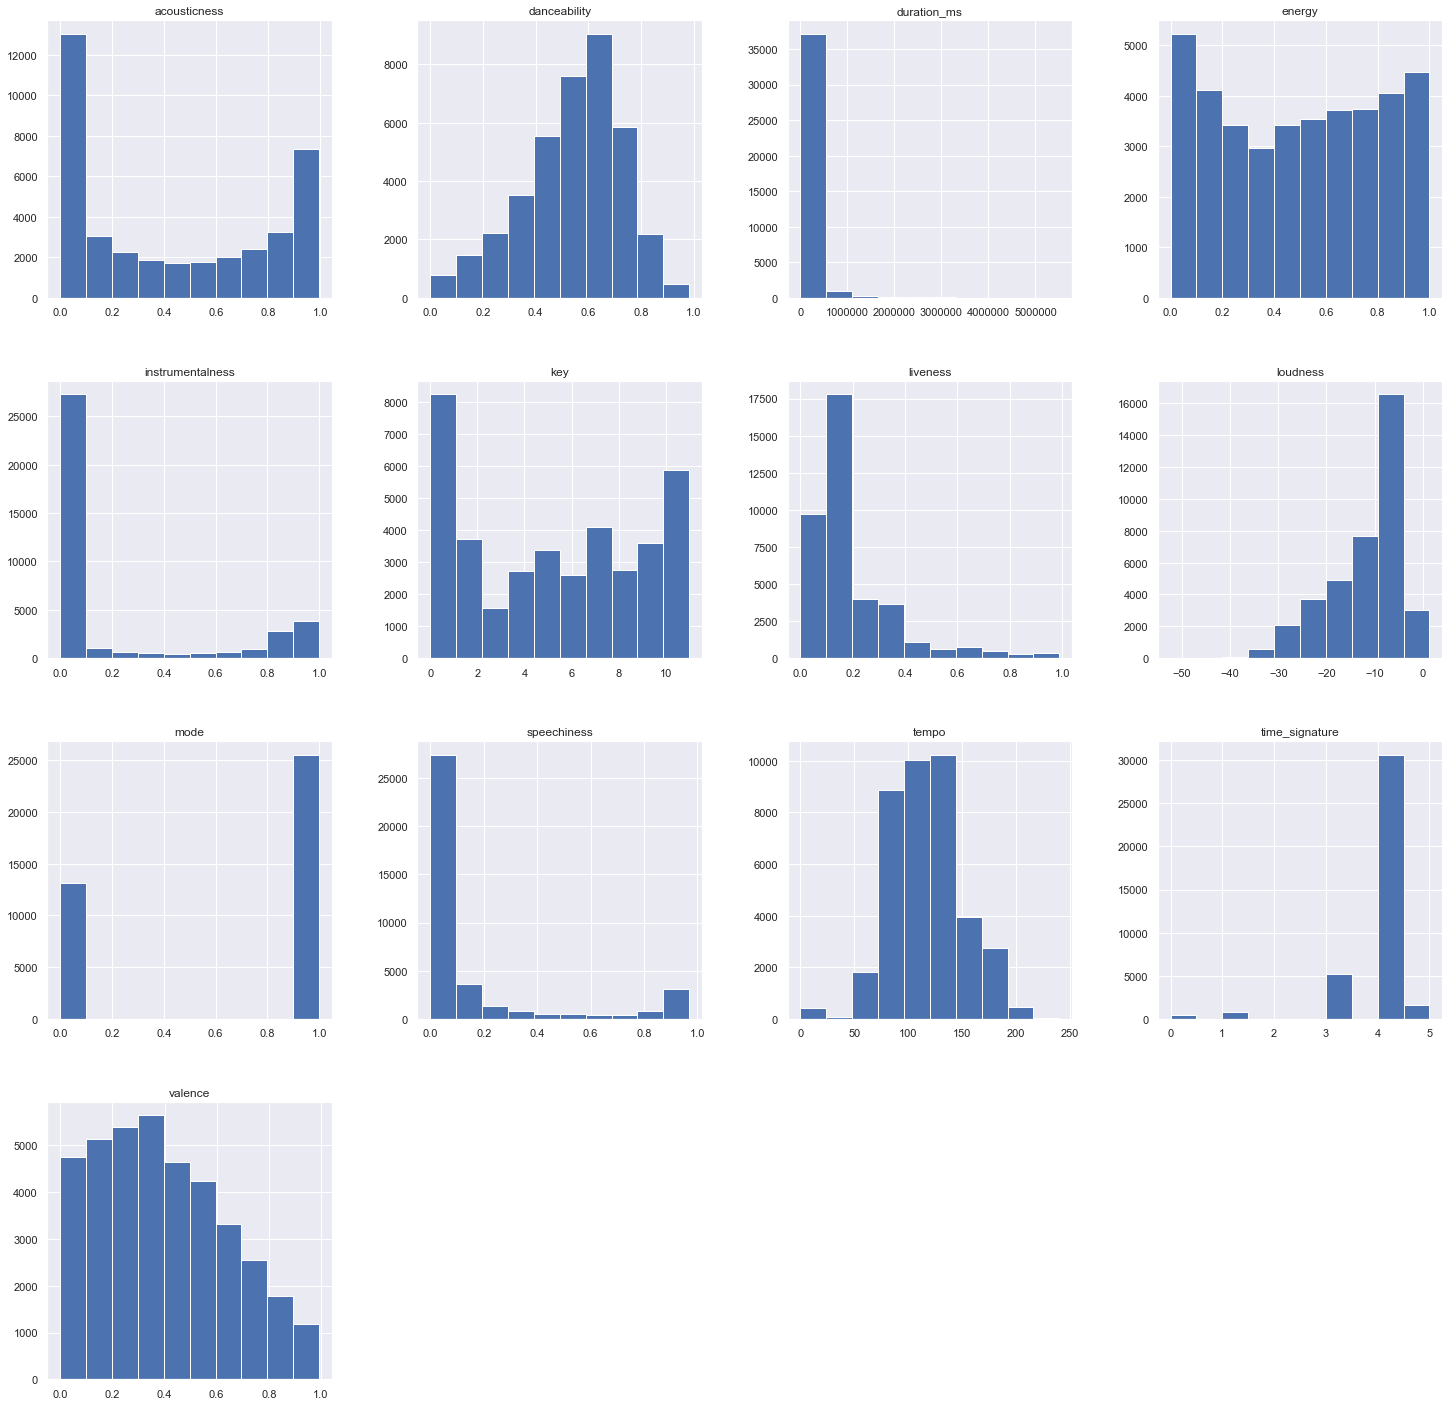

In [14]:
df.hist(figsize=(25,25))

In [15]:
print("Unique Values")
print(df.nunique().sort_values())

Unique Values
type                    1
mode                    2
time_signature          5
key                    12
danceability         1111
liveness             1621
speechiness          1639
valence              1678
energy               2221
acousticness         4306
instrumentalness     4995
loudness            18884
tempo               27958
duration_ms         28638
id                  38663
uri                 38663
track_href          38663
analysis_url        38663
dtype: int64


We see that mode, time_signature, and key are seemingly useless in our analysis as they have so little variance.

In [17]:
song_ids = df["id"]
newdf = df.drop(["mode", "time_signature", "key", "type", "id", "uri", "track_href", "analysis_url"], axis=1)

newdf.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.173,0.0522,-27.883,0.0541,0.98000,0.019000,0.2040,0.062,171.661,380067
1,0.764,0.6900,-5.961,0.0473,0.45000,0.000000,0.0815,0.939,119.481,151507
2,0.431,0.0486,-23.585,0.0334,0.99400,0.906000,0.1070,0.345,156.648,160091
3,0.573,0.8460,-4.866,0.0344,0.00372,0.000079,0.2900,0.562,127.061,191053
4,0.684,0.7330,-5.224,0.1160,0.54300,0.000040,0.4530,0.623,130.060,210379


In [19]:
newdf.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.166967,0.277649,0.264008,-0.209559,-0.305153,-0.004241,0.534229,0.102976,0.018401
energy,0.166967,1.000000,0.836471,-0.271310,-0.773728,-0.255882,0.162062,0.361689,0.273911,-0.084527
loudness,0.277649,0.836471,1.000000,-0.325704,-0.691021,-0.394006,0.056483,0.355689,0.268667,-0.104404
speechiness,0.264008,-0.271310,-0.325704,1.000000,0.194426,-0.243855,0.243271,0.033520,-0.020022,0.264112
acousticness,-0.209559,-0.773728,-0.691021,0.194426,1.000000,0.280802,-0.045633,-0.277331,-0.265241,0.033771
instrumentalness,-0.305153,-0.255882,-0.394006,-0.243855,0.280802,1.000000,-0.128380,-0.326583,-0.086643,-0.041570
liveness,-0.004241,0.162062,0.056483,0.243271,-0.045633,-0.128380,1.000000,0.050492,0.031562,0.048743
valence,0.534229,0.361689,0.355689,0.033520,-0.277331,-0.326583,0.050492,1.000000,0.133233,-0.074221
tempo,0.102976,0.273911,0.268667,-0.020022,-0.265241,-0.086643,0.031562,0.133233,1.000000,0.017982
duration_ms,0.018401,-0.084527,-0.104404,0.264112,0.033771,-0.041570,0.048743,-0.074221,0.017982,1.000000


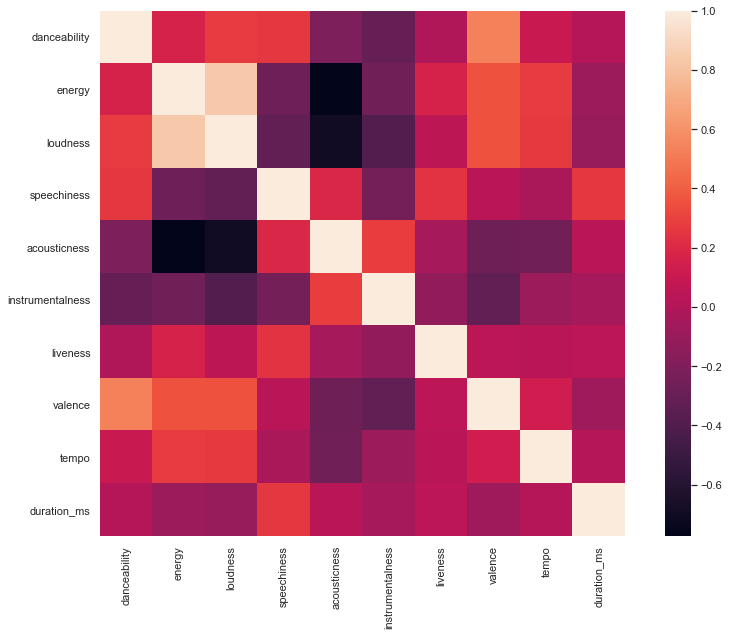

In [20]:
corr_mat = newdf.corr()

f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr_mat, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

#  Model

In [21]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing

In [22]:
data_scaled = pd.DataFrame(preprocessing.scale(newdf),columns = newdf.columns)
data_scaled.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-1.969187,-1.444365,-2.109712,-0.444375,1.455654,-0.548045,0.071631,-1.356586,1.651676,0.563145
1,1.196562,0.635879,0.778175,-0.469404,0.056238,-0.601367,-0.669341,2.198059,0.096222,-0.426054
2,-0.587185,-1.456107,-1.543517,-0.520566,1.492620,1.941258,-0.515098,-0.209534,1.204148,-0.388903
3,0.173452,1.144687,0.922424,-0.516885,-1.122123,-0.601146,0.591824,0.670008,0.322177,-0.254900
4,0.768034,0.776127,0.875263,-0.216541,0.301796,-0.601256,1.577771,0.917252,0.411575,-0.171258


We select the number of clusters by Elbow method

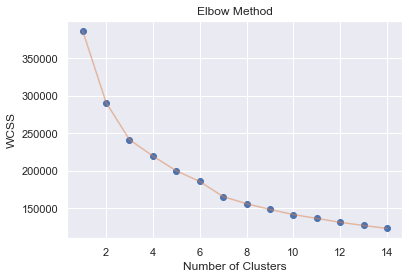

In [23]:
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1 , 15) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Seems like at 5 clusters is the knee of the curve

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(data_scaled)

y_kmeans_df = pd.DataFrame(data=y_kmeans, dtype=int)
y_kmeans_df.columns = ['k_cluster']

In [25]:
df_with_cluster = pd.concat([newdf, y_kmeans_df], axis=1)
df_with_cluster.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,k_cluster
0,0.173,0.0522,-27.883,0.0541,0.98000,0.019000,0.2040,0.062,171.661,380067,4
1,0.764,0.6900,-5.961,0.0473,0.45000,0.000000,0.0815,0.939,119.481,151507,1
2,0.431,0.0486,-23.585,0.0334,0.99400,0.906000,0.1070,0.345,156.648,160091,4
3,0.573,0.8460,-4.866,0.0344,0.00372,0.000079,0.2900,0.562,127.061,191053,1
4,0.684,0.7330,-5.224,0.1160,0.54300,0.000040,0.4530,0.623,130.060,210379,1


In [26]:
df_with_cluster['k_cluster'].value_counts()

1    10840
0     9208
2     7518
4     5834
3     5263
Name: k_cluster, dtype: int64

In [27]:
df_with_cluster.loc[df_with_cluster['k_cluster'] == 0][:10]

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,k_cluster
13,0.567,0.896,-4.755,0.1360,0.046200,0.000011,0.0362,0.459,150.039,189119,0
14,0.390,0.790,-3.783,0.0345,0.026400,0.000000,0.5100,0.183,78.016,361661,0
15,0.741,0.865,-11.851,0.0400,0.003360,0.911000,0.1140,0.303,124.013,435836,0
17,0.495,0.830,-4.756,0.0401,0.000132,0.000006,0.4040,0.364,151.852,219144,0
19,0.646,0.814,-5.263,0.0437,0.000415,0.030500,0.0882,0.117,121.043,214959,0
32,0.376,0.941,-3.839,0.0661,0.000030,0.000338,0.2590,0.236,154.964,289558,0
35,0.468,0.982,-3.662,0.0714,0.002160,0.000000,0.3260,0.134,102.003,297083,0
37,0.229,0.994,-3.431,0.2200,0.000070,0.005480,0.3180,0.115,156.623,241467,0
39,0.592,0.568,-9.227,0.5530,0.424000,0.000954,0.2010,0.143,151.339,245028,0
40,0.643,0.539,-11.675,0.0488,0.000428,0.915000,0.1760,0.326,123.012,534343,0


In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df_with_cluster.groupby("k_cluster").describe() 

danceability                                                   \
                 count      mean       std     min    25%    50%    75%   
k_cluster                                                                 
0               9208.0  0.465820  0.141529  0.0599  0.375  0.473  0.559   
1              10840.0  0.684918  0.115435  0.2080  0.604  0.685  0.768   
2               7518.0  0.534673  0.137813  0.0000  0.438  0.541  0.632   
3               5263.0  0.644528  0.076057  0.0639  0.606  0.654  0.696   
4               5834.0  0.304482  0.178465  0.0000  0.169  0.291  0.435   

                   energy                                                      \
             max    count      mean       std      min     25%     50%    75%   
k_cluster                                                                       
0          0.908   9208.0  0.803423  0.158111  0.12500  0.6950  0.8430  0.939   
1          0.983  10840.0  0.683925  0.159670  0.03150  0.5680  0.6900  0.810   
2          0.956   7518.0  0.325878  0.147717  0.00041  0.2200  0.3240  0.430   
3          0.936   5263.0  0.229180  0.183883  0.00076  0.1010  0.1820  0.304   
4          0.866   5834.0  0.115178  0.127351  0.00000  0.0302  0.0738  0.157   

                 loudness                                                  \
             max    count       mean       std     min       25%      50%   
k_cluster                                                                   
0          1.000   9208.0  -6.107334  2.694065 -33.608  -7.41525  -5.6450   
1          0.996  10840.0  -7.071341  2.777585 -25.388  -8.53375  -6.6405   
2          0.932   7518.0 -11.829463  3.995483 -35.031 -14.02600 -11.2075   
3          0.993   5263.0 -19.436415  5.555194 -40.904 -23.20100 -19.1580   
4          0.999   5834.0 -23.095723  5.901701 -52.301 -27.02800 -22.9260   

                           speechiness                                      \
                75%    max       count      mean       std     min     25%   
k_cluster                                                                    
0          -4.30675  1.329      9208.0  0.082586  0.074940  0.0235  0.0392   
1          -5.14175  1.085     10840.0  0.086194  0.086020  0.0226  0.0365   
2          -8.98200 -2.555      7518.0  0.065031  0.077315  0.0000  0.0314   
3         -15.49150 -3.390      5263.0  0.816774  0.168774  0.0323  0.7510   
4         -18.72525 -6.805      5834.0  0.047502  0.040557  0.0000  0.0365   

                                    acousticness                      \
               50%       75%    max        count      mean       std   
k_cluster                                                              
0          0.05550  0.093800  0.859       9208.0  0.065828  0.126654   
1          0.05130  0.093100  0.816      10840.0  0.191923  0.207475   
2          0.03785  0.056075  0.574       7518.0  0.707974  0.228845   
3          0.89700  0.935000  0.969       5263.0  0.657084  0.281593   
4          0.04190  0.050200  0.734       5834.0  0.875471  0.217097   

                                                        instrumentalness  \
                min       25%      50%       75%    max            count   
k_cluster                                                                  
0          0.000000  0.000454  0.00777  0.066525  0.961           9208.0   
1          0.000004  0.023975  0.11400  0.300000  0.988          10840.0   
2          0.000003  0.570000  0.77000  0.893000  0.996           7518.0   
3          0.000086  0.477500  0.74000  0.890000  0.995           5263.0   
4          0.000000  0.884000  0.96600  0.991000  0.996           5834.0   

                                                                         \
               mean       std  min       25%       50%       75%    max   
k_cluster                                                                 
0          0.204535  0.326130  0.0  0.000006  0.002360  0.331500  0.995   
1          0.090367  0.230962  0

In [90]:
df_with_cluster.to_csv('df_with_cluster.csv', index=0)

In [ ]:
df_with_cluster_and_id = pd.concat([df_with_cluster,song_ids], axis=1)
df_with_cluster_and_id.to_csv()